# Credit card offer

## Import required libraries

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

## Define a goal

**GOAL: Know if a customer will accept a credit card offer or not.**

## Get data

In [138]:
headers =  ['customer_number', 'offer_accepted', 'reward', 'mailer_type', 'income_level', 'bank_accounts_open', 'overdraft_protection', 'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size', 'own_your_home', 'avg_balance', 'balance_q1',
            'balance_q2', 'balance_q3', 'balance_q4']

In [139]:
data = pd.read_csv('./creditcardmarketing.csv', header=None, names = headers)

In [140]:
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,avg_balance,balance_q1,balance_q2,balance_q3,balance_q4
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [141]:
data.shape

(18000, 17)

In [142]:
## data.to_csv('./creditcardmarketing_tab.csv', index=False)

## Explore data

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  avg_balance           17976 non-null  float64
 13  balance_q1            17976 non-null  float64
 14  balance_q2            17976 non-null  float64
 15  balance_q3         

In [144]:
data.isna().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
avg_balance             24
balance_q1              24
balance_q2              24
balance_q3              24
balance_q4              24
dtype: int64

In [145]:
data.isna().sum() / data.shape[0]

customer_number         0.000000
offer_accepted          0.000000
reward                  0.000000
mailer_type             0.000000
income_level            0.000000
bank_accounts_open      0.000000
overdraft_protection    0.000000
credit_rating           0.000000
credit_cards_held       0.000000
homes_owned             0.000000
household_size          0.000000
own_your_home           0.000000
avg_balance             0.001333
balance_q1              0.001333
balance_q2              0.001333
balance_q3              0.001333
balance_q4              0.001333
dtype: float64

* We have null values so we need to know what we will do with them.

## Deal with missing values

In [146]:
data.isna().sum()[data.isna().sum() > 0]

avg_balance    24
balance_q1     24
balance_q2     24
balance_q3     24
balance_q4     24
dtype: int64

* I decided to remove those observations because my dataset has a 18,000 observations, I think that 24 are deprecable.

In [147]:
data = data.dropna()

In [148]:
data.shape

(17976, 17)

## Deal with outliers

In [149]:
summary_cols = ['balance_q1', 'balance_q2', 'balance_q3', 'balance_q4']

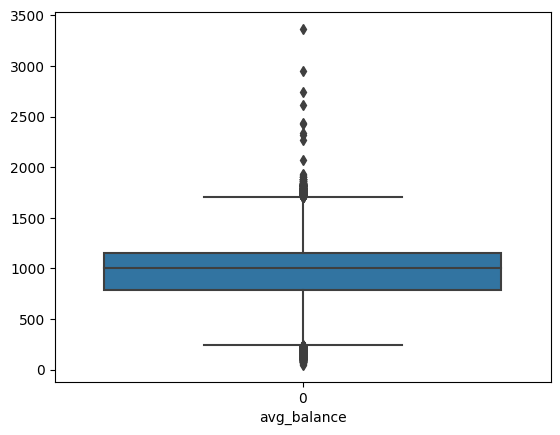

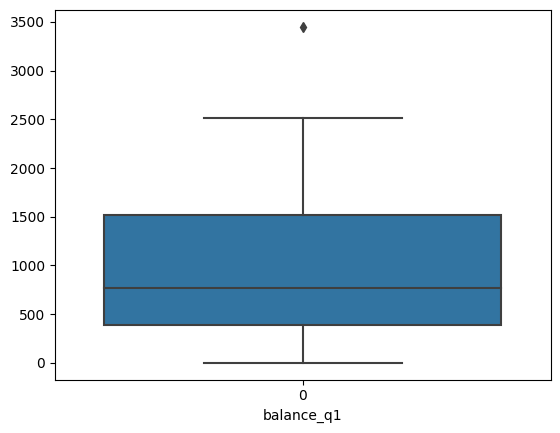

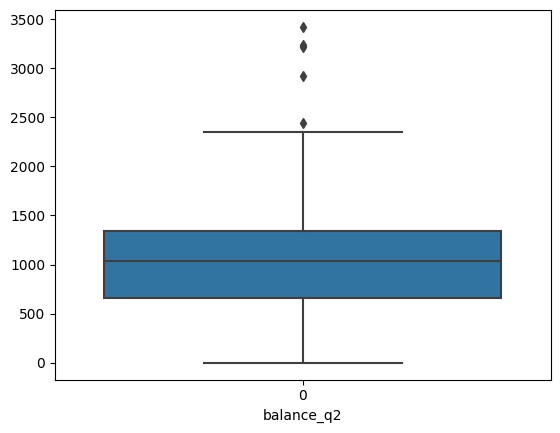

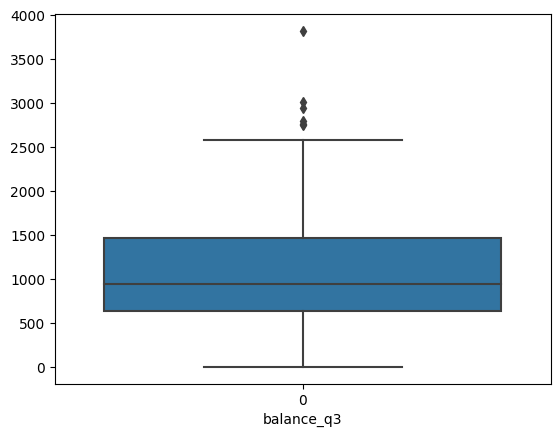

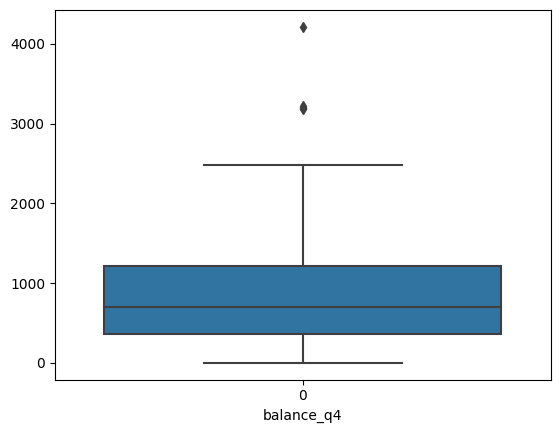

In [150]:
for column in ['avg_balance'] + summary_cols:    
    sns.boxplot(data[column])
    plt.xlabel(column)
    plt.show()

In [151]:
summary = data[summary_cols].describe().T

In [152]:
summary

,count,mean,std,min,25%,50%,75%,max
balance_q1,17976.0,910.450656,620.077060,0.0,392.75,772.0,1521.0,3450.0
balance_q2,17976.0,999.392190,457.402268,0.0,663.00,1032.0,1342.0,3421.0
balance_q3,17976.0,1042.033600,553.452599,0.0,633.00,945.5,1463.0,3823.0
balance_q4,17976.0,810.185803,559.001365,0.0,363.00,703.0,1212.0,4215.0


In [153]:
summary['IQR'] = summary['75%'] - summary['25%']

In [154]:
summary

,count,mean,std,min,25%,50%,75%,max,IQR
balance_q1,17976.0,910.450656,620.077060,0.0,392.75,772.0,1521.0,3450.0,1128.25
balance_q2,17976.0,999.392190,457.402268,0.0,663.00,1032.0,1342.0,3421.0,679.00
balance_q3,17976.0,1042.033600,553.452599,0.0,633.00,945.5,1463.0,3823.0,830.00
balance_q4,17976.0,810.185803,559.001365,0.0,363.00,703.0,1212.0,4215.0,849.00


In [155]:
summary['upper_limit'] = summary['75%'] + 1.5 * summary['IQR']

In [156]:
summary['lower_limit'] = summary['25%'] - 1.5 * summary['IQR']

In [157]:
summary

,count,mean,std,min,25%,50%,75%,max,IQR,upper_limit,lower_limit
balance_q1,17976.0,910.450656,620.077060,0.0,392.75,772.0,1521.0,3450.0,1128.25,3213.375,-1299.625
balance_q2,17976.0,999.392190,457.402268,0.0,663.00,1032.0,1342.0,3421.0,679.00,2360.500,-355.500
balance_q3,17976.0,1042.033600,553.452599,0.0,633.00,945.5,1463.0,3823.0,830.00,2708.000,-612.000
balance_q4,17976.0,810.185803,559.001365,0.0,363.00,703.0,1212.0,4215.0,849.00,2485.500,-910.500


In [158]:
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,avg_balance,balance_q1,balance_q2,balance_q3,balance_q4
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [159]:
for column in summary_cols:
    print(f'{column.upper()} total outliers: ')
    print(data[(data[column] < summary.loc[column, 'lower_limit']) | (data[column] > summary.loc[column, 'upper_limit'])].shape[0])
    print('----------' * 5)

BALANCE_Q1 total outliers: 
1
--------------------------------------------------
BALANCE_Q2 total outliers: 
5
--------------------------------------------------
BALANCE_Q3 total outliers: 
6
--------------------------------------------------
BALANCE_Q4 total outliers: 
5
--------------------------------------------------


In [160]:
data[(data['balance_q1'] < summary.loc['balance_q1', 'lower_limit']) | (data['balance_q1'] > summary.loc['balance_q1', 'upper_limit'])]

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,avg_balance,balance_q1,balance_q2,balance_q3,balance_q4
12635,12636,No,Air Miles,Letter,High,1,No,High,3,2,4,No,2948.5,3450.0,3214.0,2750.0,2380.0


In [161]:
data[(data['balance_q2'] < summary.loc['balance_q2', 'lower_limit']) | (data['balance_q2'] > summary.loc['balance_q2', 'upper_limit'])]

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,avg_balance,balance_q1,balance_q2,balance_q3,balance_q4
2296,2297,No,Air Miles,Letter,High,1,No,Medium,2,2,2,No,3366.25,2509.0,2918.0,3823.0,4215.0
8887,8888,No,Cash Back,Letter,Medium,1,No,Medium,2,1,2,Yes,2738.50,2453.0,3240.0,3016.0,2245.0
10576,10577,No,Points,Letter,Medium,3,No,High,1,1,2,Yes,2609.50,2310.0,3421.0,2802.0,1905.0
12635,12636,No,Air Miles,Letter,High,1,No,High,3,2,4,No,2948.50,3450.0,3214.0,2750.0,2380.0
15259,15260,No,Air Miles,Letter,Medium,1,No,High,2,1,3,No,2320.50,2502.0,2445.0,2012.0,2323.0


In [162]:
data[(data['balance_q3'] < summary.loc['balance_q3', 'lower_limit']) | (data['balance_q3'] > summary.loc['balance_q3', 'upper_limit'])]

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,avg_balance,balance_q1,balance_q2,balance_q3,balance_q4
2296,2297,No,Air Miles,Letter,High,1,No,Medium,2,2,2,No,3366.25,2509.0,2918.0,3823.0,4215.0
8887,8888,No,Cash Back,Letter,Medium,1,No,Medium,2,1,2,Yes,2738.50,2453.0,3240.0,3016.0,2245.0
10576,10577,No,Points,Letter,Medium,3,No,High,1,1,2,Yes,2609.50,2310.0,3421.0,2802.0,1905.0
12635,12636,No,Air Miles,Letter,High,1,No,High,3,2,4,No,2948.50,3450.0,3214.0,2750.0,2380.0
14003,14004,No,Cash Back,Letter,Medium,1,No,Medium,1,1,1,Yes,2437.50,2250.0,2134.0,2945.0,2421.0
15608,15609,No,Points,Postcard,High,1,No,Low,1,1,4,Yes,2271.50,1666.0,1468.0,2761.0,3191.0


In [163]:
data[(data['balance_q4'] < summary.loc['balance_q1', 'lower_limit']) | (data['balance_q4'] > summary.loc['balance_q4', 'upper_limit'])]

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,avg_balance,balance_q1,balance_q2,balance_q3,balance_q4
2296,2297,No,Air Miles,Letter,High,1,No,Medium,2,2,2,No,3366.25,2509.0,2918.0,3823.0,4215.0
2655,2656,No,Points,Letter,Medium,1,Yes,Low,2,1,5,No,2336.75,1638.0,2351.0,2180.0,3178.0
8777,8778,No,Cash Back,Postcard,Medium,1,No,High,1,1,2,No,2073.25,1490.0,1704.0,1898.0,3201.0
12633,12634,No,Cash Back,Letter,Medium,1,No,Medium,3,1,3,Yes,1182.00,179.0,217.0,1114.0,3218.0
15608,15609,No,Points,Postcard,High,1,No,Low,1,1,4,Yes,2271.50,1666.0,1468.0,2761.0,3191.0


In [164]:
def remove_outliers(df,columns):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        df = df[(df[col] > summary.loc[col, 'lower_limit']) & (df[col] < summary.loc[col, 'upper_limit'])]
        
    return df

In [165]:
data = remove_outliers(data, summary_cols)

Working on column: balance_q1
Working on column: balance_q2
Working on column: balance_q3
Working on column: balance_q4


In [166]:
data.shape

(17966, 17)

In [167]:
data = data.reset_index(drop = True)

In [168]:
data

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,avg_balance,balance_q1,balance_q2,balance_q3,balance_q4
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17962,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17963,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17964,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


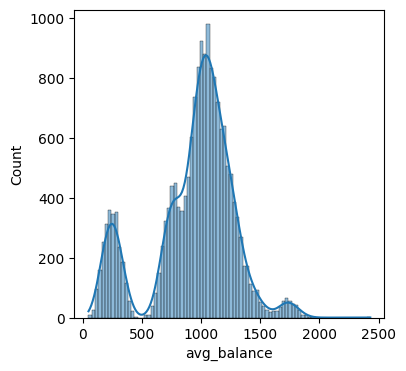

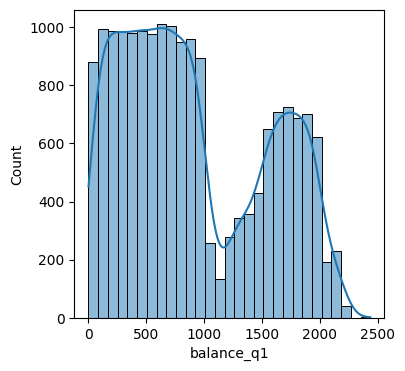

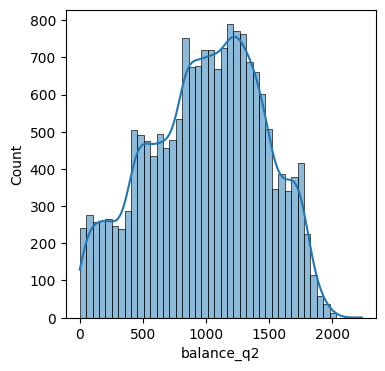

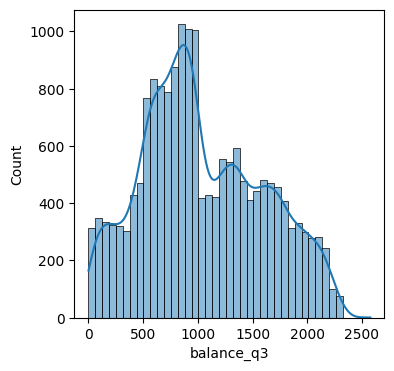

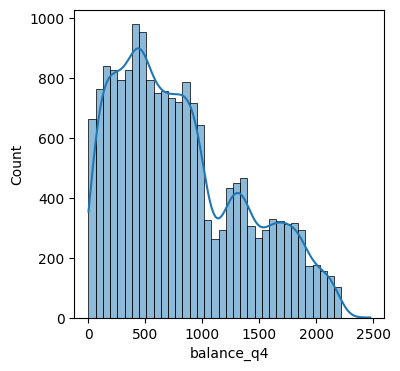

In [169]:
for column in data.select_dtypes(np.number).columns[5:]:
    plt.figure(figsize = (4,4))
    sns.histplot(data[column], kde= True)
    plt.show()

## Split data into categorical and numerical

### Numerical data

In [170]:
def transform_target(row):
    if row == 'No':
        return 0
    else:
        return 1

In [171]:
data['offer_accepted'] = data['offer_accepted'].apply(lambda x: transform_target(x))

In [172]:
data['offer_accepted'] = data['offer_accepted'].astype(np.int64)

In [173]:
numerical_data = data.select_dtypes(np.number)

In [174]:
numerical_data.columns

Index(['customer_number', 'offer_accepted', 'bank_accounts_open',
       'credit_cards_held', 'homes_owned', 'household_size', 'avg_balance',
       'balance_q1', 'balance_q2', 'balance_q3', 'balance_q4'],
      dtype='object')

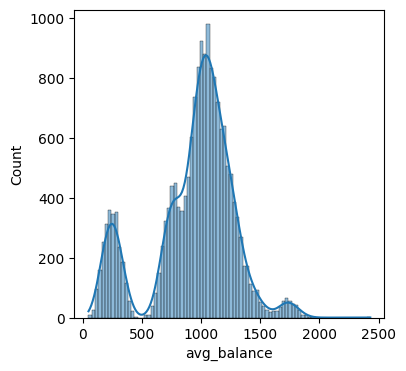

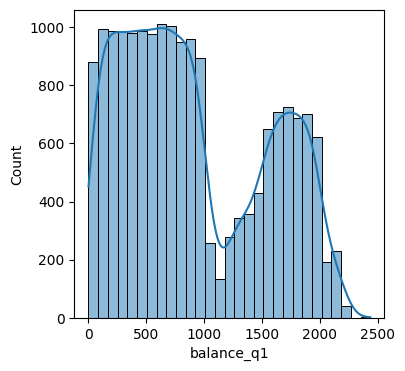

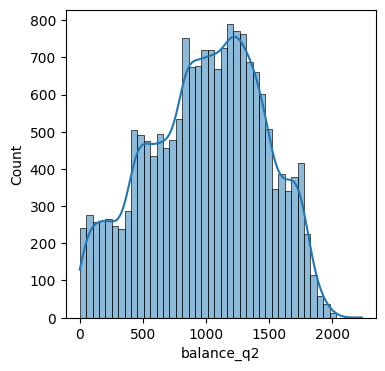

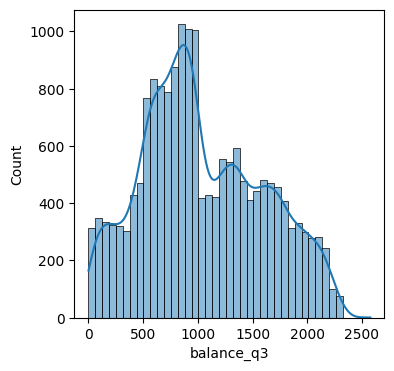

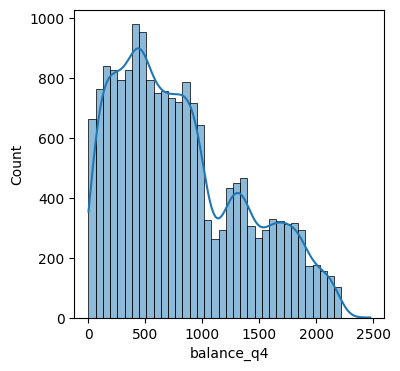

In [175]:
for column in numerical_data.drop(columns=['customer_number']).columns[5:]:
    plt.figure(figsize = (4,4))
    sns.histplot(numerical_data[column], kde= True)
    plt.show()

In [176]:
numerical_data = numerical_data.reset_index(drop = True)

In [177]:
numerical_data

,customer_number,offer_accepted,bank_accounts_open,credit_cards_held,homes_owned,household_size,avg_balance,balance_q1,balance_q2,balance_q3,balance_q4
0,1,0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,2,0,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,3,0,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,4,0,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,5,0,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...
17961,17996,0,1,1,1,5,167.50,136.0,65.0,71.0,398.0
17962,17997,0,1,3,1,3,850.50,984.0,940.0,943.0,535.0
17963,17998,0,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0
17964,17999,0,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0


In [178]:
numerical_corr = numerical_data.drop(columns=['customer_number', 'offer_accepted']).corr()

In [179]:
numerical_corr

,bank_accounts_open,credit_cards_held,homes_owned,household_size,avg_balance,balance_q1,balance_q2,balance_q3,balance_q4
bank_accounts_open,1.000000,-0.001406,0.004875,0.008757,-0.003776,-0.002800,-0.008372,0.000251,0.000271
credit_cards_held,-0.001406,1.000000,-0.002621,-0.003313,-0.003100,-0.009330,-0.007089,-0.007262,0.015623
homes_owned,0.004875,-0.002621,1.000000,0.005181,0.017549,0.012781,0.009376,0.007451,0.014635
household_size,0.008757,-0.003313,0.005181,1.000000,-0.001981,-0.004386,-0.007625,0.004811,0.001393
avg_balance,-0.003776,-0.003100,0.017549,-0.001981,1.000000,0.479601,0.799277,0.751505,0.569357
balance_q1,-0.002800,-0.009330,0.012781,-0.004386,0.479601,1.000000,0.481230,-0.064610,-0.241951
balance_q2,-0.008372,-0.007089,0.009376,-0.007625,0.799277,0.481230,1.000000,0.485254,0.164960
balance_q3,0.000251,-0.007262,0.007451,0.004811,0.751505,-0.064610,0.485254,1.000000,0.563470
balance_q4,0.000271,0.015623,0.014635,0.001393,0.569357,-0.241951,0.164960,0.563470,1.000000


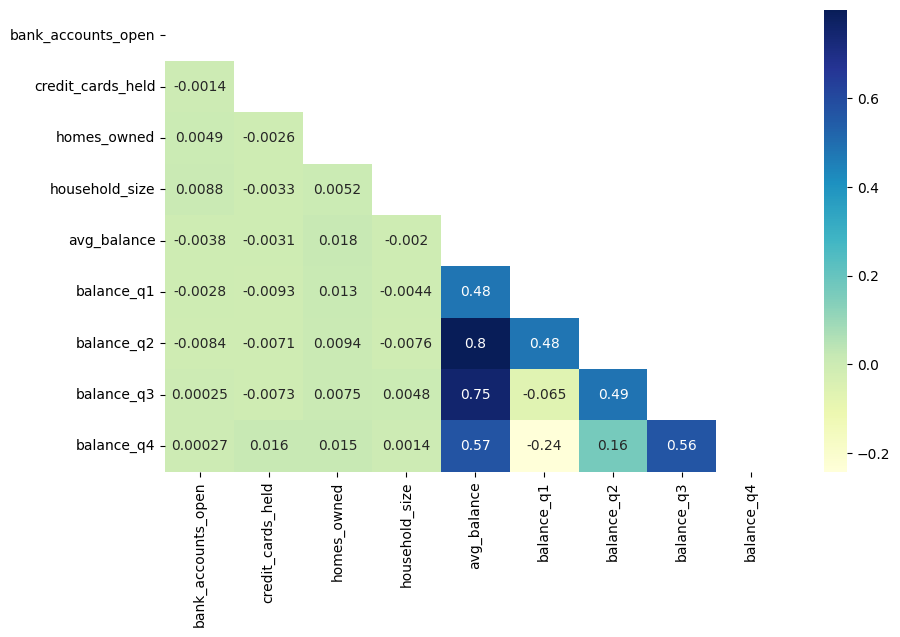

In [180]:
mask = np.triu(numerical_corr)

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_corr, cmap="YlGnBu", annot=True, mask=mask)
plt.show()

In [181]:
numerical_data = numerical_data.drop(columns=['avg_balance', 'customer_number'])

In [182]:
numerical_data

,offer_accepted,bank_accounts_open,credit_cards_held,homes_owned,household_size,balance_q1,balance_q2,balance_q3,balance_q4
0,0,1,2,1,4,1669.0,877.0,1095.0,1002.0
1,0,1,2,2,5,39.0,106.0,78.0,366.0
2,0,2,2,1,2,367.0,352.0,145.0,242.0
3,0,2,1,1,4,1578.0,1760.0,1119.0,419.0
4,0,1,2,1,6,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...
17961,0,1,1,1,5,136.0,65.0,71.0,398.0
17962,0,1,3,1,3,984.0,940.0,943.0,535.0
17963,0,1,2,1,4,918.0,767.0,1170.0,1494.0
17964,0,1,4,2,2,626.0,983.0,865.0,1615.0


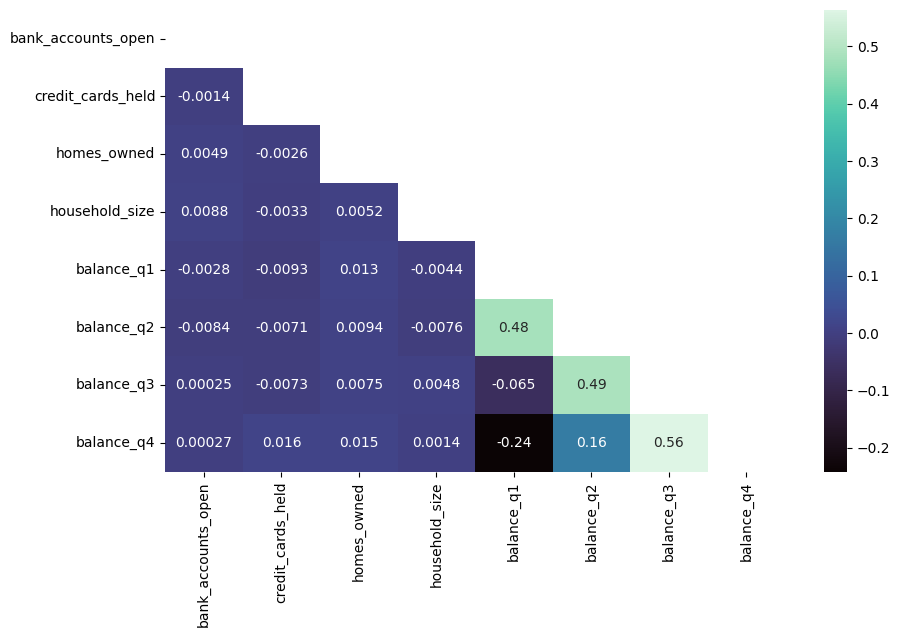

In [183]:
mask = np.triu( numerical_data.drop(columns=['offer_accepted']).corr())

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.drop(columns=['offer_accepted']).corr(), cmap="mako", annot=True, mask=mask)
plt.show()

### Categorical data

In [184]:
categorical_data = data.select_dtypes(object)

In [185]:
categorical_data.columns

Index(['reward', 'mailer_type', 'income_level', 'overdraft_protection',
       'credit_rating', 'own_your_home'],
      dtype='object')

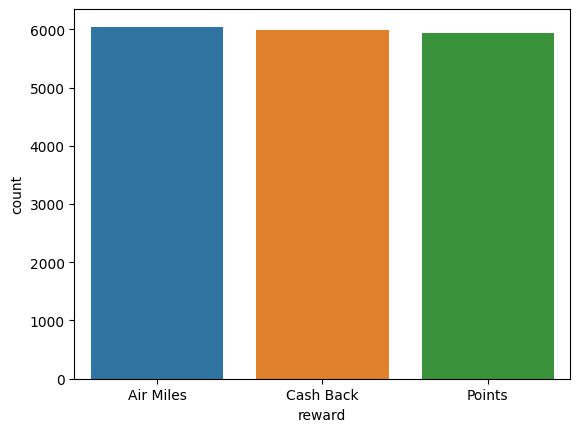

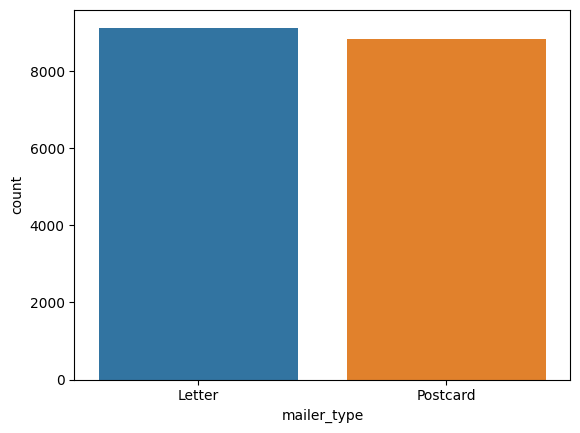

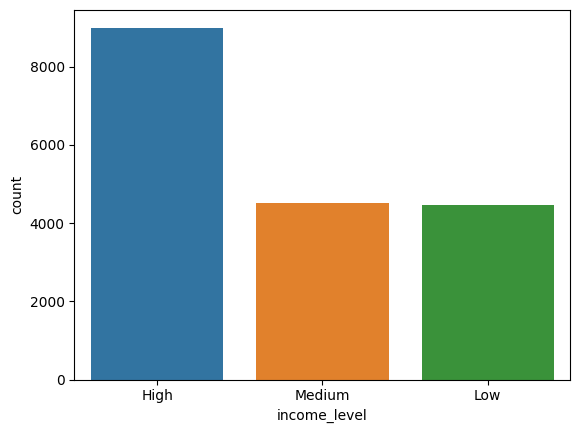

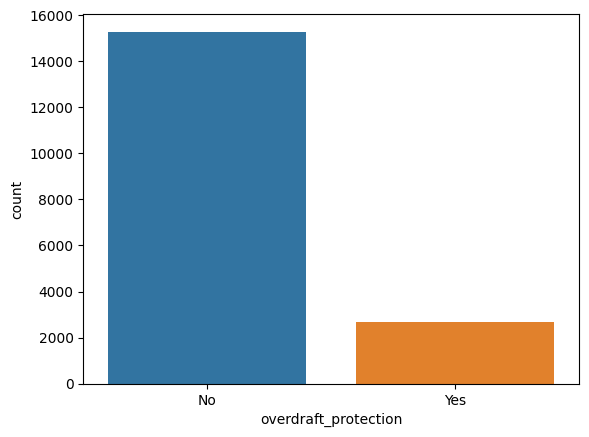

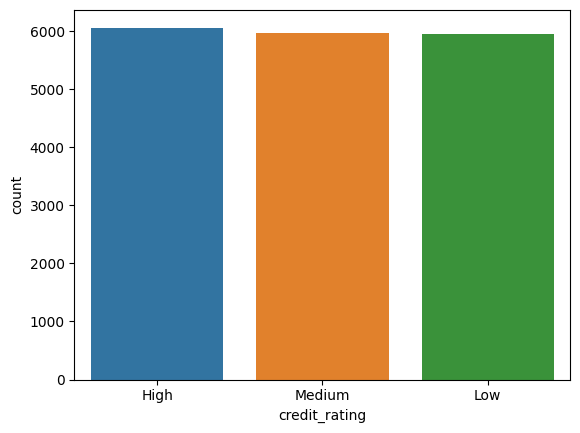

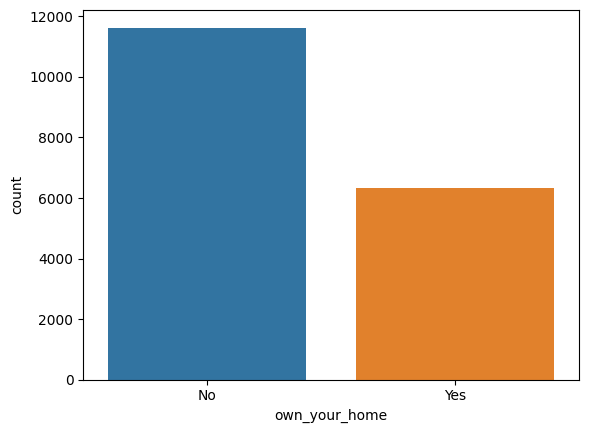

In [186]:
for column in categorical_data.columns:
    sns.barplot(data = data, x = categorical_data[column].unique(), y = categorical_data[column].value_counts(dropna=False))
    plt.xlabel(column)
    plt.show()

In [187]:
# Encoding data
categories = [['Low', 'Medium', 'High']]

ordinal_encoder = OrdinalEncoder(categories=categories)

In [188]:
income_oe_data = ordinal_encoder.fit_transform(categorical_data[['income_level']])

In [189]:
rating_oe_data = ordinal_encoder.fit_transform(categorical_data[['credit_rating']])

In [190]:
categorical_data = categorical_data.drop(columns=['income_level', 'credit_rating'])

In [191]:
categorical_data.columns

Index(['reward', 'mailer_type', 'overdraft_protection', 'own_your_home'], dtype='object')

In [192]:
categorical_data = pd.get_dummies(categorical_data, drop_first=True)

In [193]:
categorical_data = categorical_data.reset_index(drop=True)

In [194]:
categorical_data

,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
0,False,False,False,False,False
1,False,False,False,False,True
2,False,False,True,False,True
3,False,False,False,False,False
4,False,False,False,False,True
...,...,...,...,...,...
17961,True,False,False,False,True
17962,True,False,False,False,True
17963,True,False,False,False,False
17964,True,False,False,False,True


In [195]:
income_data = pd.DataFrame(income_oe_data, columns=['income_level'])

In [196]:
income_data = income_data.reset_index(drop = True)

In [197]:
income_data

,income_level
0,2.0
1,1.0
2,2.0
3,1.0
4,1.0
...,...
17961,2.0
17962,2.0
17963,2.0
17964,1.0


In [198]:
income_data.shape

(17966, 1)

In [199]:
rating_data = pd.DataFrame(rating_oe_data, columns=['credit_rating'])

In [200]:
rating_data = rating_data.reset_index(drop = True)

In [201]:
rating_data

,credit_rating
0,2.0
1,1.0
2,1.0
3,2.0
4,1.0
...,...
17961,0.0
17962,0.0
17963,0.0
17964,1.0


In [202]:
rating_data.shape

(17966, 1)

In [203]:
categorical_data = pd.concat([categorical_data, income_data, rating_data], axis = 1)

In [204]:
categorical_data

,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,income_level,credit_rating
0,False,False,False,False,False,2.0,2.0
1,False,False,False,False,True,1.0,1.0
2,False,False,True,False,True,2.0,1.0
3,False,False,False,False,False,1.0,2.0
4,False,False,False,False,True,1.0,1.0
...,...,...,...,...,...,...,...
17961,True,False,False,False,True,2.0,0.0
17962,True,False,False,False,True,2.0,0.0
17963,True,False,False,False,False,2.0,0.0
17964,True,False,False,False,True,1.0,1.0


### Get dataframe to it use into analysis

In [205]:
full_data = pd.concat([numerical_data, categorical_data], axis = 1).reset_index(drop = True)

In [206]:
full_data.columns = full_data.columns.str.lower().str.replace(' ', '_')

In [207]:
full_data

,offer_accepted,bank_accounts_open,credit_cards_held,homes_owned,household_size,balance_q1,balance_q2,balance_q3,balance_q4,reward_cash_back,reward_points,mailer_type_postcard,overdraft_protection_yes,own_your_home_yes,income_level,credit_rating
0,0,1,2,1,4,1669.0,877.0,1095.0,1002.0,False,False,False,False,False,2.0,2.0
1,0,1,2,2,5,39.0,106.0,78.0,366.0,False,False,False,False,True,1.0,1.0
2,0,2,2,1,2,367.0,352.0,145.0,242.0,False,False,True,False,True,2.0,1.0
3,0,2,1,1,4,1578.0,1760.0,1119.0,419.0,False,False,False,False,False,1.0,2.0
4,0,1,2,1,6,2140.0,1357.0,982.0,365.0,False,False,False,False,True,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0,1,1,1,5,136.0,65.0,71.0,398.0,True,False,False,False,True,2.0,0.0
17962,0,1,3,1,3,984.0,940.0,943.0,535.0,True,False,False,False,True,2.0,0.0
17963,0,1,2,1,4,918.0,767.0,1170.0,1494.0,True,False,False,False,False,2.0,0.0
17964,0,1,4,2,2,626.0,983.0,865.0,1615.0,True,False,False,False,True,1.0,1.0


## Check data balance (classes)

In [208]:
accepted, not_accepted = full_data['offer_accepted'].value_counts()

In [209]:
print('Percentage of those clients that accepted the offer: {: .2f}%'.format(accepted / (accepted + not_accepted) * 100))
print("Percentage of those clients that didn't accept the offer: {: .2f}%".format(not_accepted / (accepted + not_accepted) * 100))

Percentage of those clients that accepted the offer:  94.32%
Percentage of those clients that didn't accept the offer:  5.68%


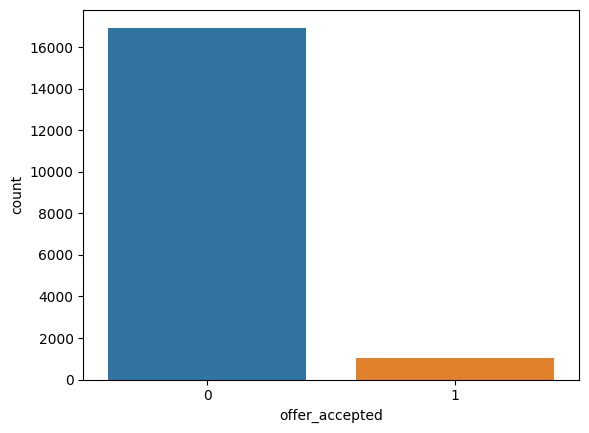

In [210]:
sns.countplot(x = full_data['offer_accepted'], data = full_data)
plt.show()

* We can notice that we have imbalanced into our target.

## Split into train and test dataset

### Initial model

In [211]:
y = full_data['offer_accepted']

In [212]:
y.shape

(17966,)

In [213]:
X = full_data.drop(columns=['offer_accepted'])

In [214]:
X.columns

Index(['bank_accounts_open', 'credit_cards_held', 'homes_owned',
       'household_size', 'balance_q1', 'balance_q2', 'balance_q3',
       'balance_q4', 'reward_cash_back', 'reward_points',
       'mailer_type_postcard', 'overdraft_protection_yes', 'own_your_home_yes',
       'income_level', 'credit_rating'],
      dtype='object')

In [215]:
X.shape

(17966, 15)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
y_train.shape

(14372,)

In [218]:
y_test.shape

(3594,)

In [219]:
numerical_cols = ['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size', 'balance_q1', 'balance_q2', 'balance_q3', 'balance_q4']
categorical_cols = ['reward_cash_back', 'reward_points', 'mailer_type_postcard', 'overdraft_protection_yes', 'own_your_home_yes', 'income_level', 'credit_rating']

### Using standard scaler

In [220]:
scaler = StandardScaler()

In [221]:
X_train_scaler = scaler.fit_transform(X_train[numerical_cols])

In [222]:
X_train_scaler = pd.DataFrame(X_train_scaler, columns=numerical_cols)

In [223]:
X_train_scaler

,bank_accounts_open,credit_cards_held,homes_owned,household_size,balance_q1,balance_q2,balance_q3,balance_q4
0,-0.541053,0.127925,-0.475297,-1.345956,-0.465910,0.216523,1.240949,1.170828
1,-0.541053,1.378635,-0.475297,-0.447569,1.296411,1.027642,-1.111953,0.318277
2,-0.541053,0.127925,-0.475297,-1.345956,-0.504678,-0.190136,-0.345808,-0.316180
3,1.583542,1.378635,-0.475297,-0.447569,-1.079735,-1.192496,-1.380649,-1.181348
4,1.583542,0.127925,-0.475297,0.450819,1.141340,-0.023076,-0.235061,-1.197570
...,...,...,...,...,...,...,...,...
14367,-0.541053,-1.122784,-0.475297,0.450819,0.538823,-0.928717,0.160720,0.525557
14368,-0.541053,1.378635,-0.475297,-0.447569,-1.045813,-2.019002,-1.480502,-1.015524
14369,-0.541053,-1.122784,-0.475297,-1.345956,-0.722747,-2.071758,-1.758275,-0.768590
14370,-0.541053,-1.122784,-0.475297,0.450819,-1.401185,-2.120118,-1.458716,-0.851502


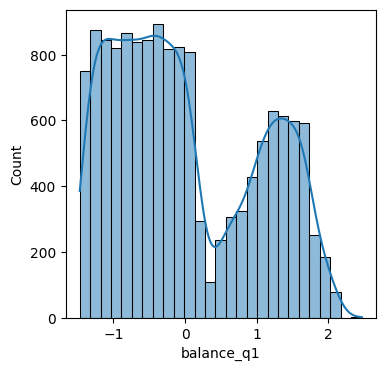

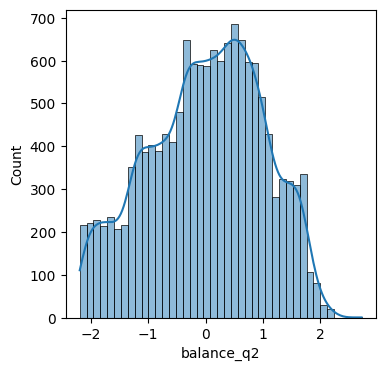

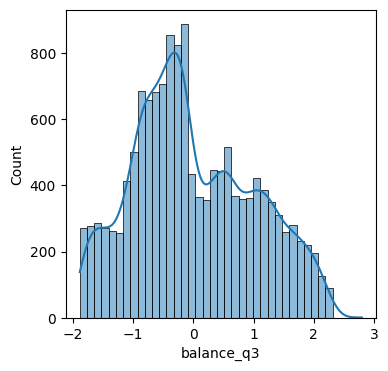

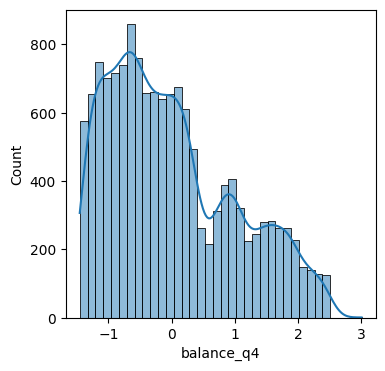

In [224]:
for column in X_train_scaler.columns[4:]:
    plt.figure(figsize = (4,4))
    sns.histplot(X_train_scaler[column], kde = True)
    plt.show()

### Using MinMax scaler

In [225]:
min_max_scaler = MinMaxScaler()

In [226]:
X_train_min_max = min_max_scaler.fit_transform(X_train[numerical_data.drop(columns = ['offer_accepted']).columns])

In [227]:
X_train_min_max = pd.DataFrame(X_train_min_max, columns=numerical_data.drop(columns = ['offer_accepted']).columns)

In [228]:
X_train_min_max

,bank_accounts_open,credit_cards_held,homes_owned,household_size,balance_q1,balance_q2,balance_q3,balance_q4
0,0.0,0.333333,0.0,0.142857,0.255441,0.490600,0.668090,0.588283
1,0.0,0.666667,0.0,0.285714,0.703491,0.655774,0.164984,0.397172
2,0.0,0.333333,0.0,0.142857,0.245585,0.407789,0.328804,0.254949
3,0.5,0.666667,0.0,0.285714,0.099384,0.203671,0.107531,0.061010
4,0.5,0.333333,0.0,0.428571,0.664066,0.441808,0.352484,0.057374
...,...,...,...,...,...,...,...,...
14367,0.0,0.000000,0.0,0.428571,0.510883,0.257386,0.437112,0.443636
14368,0.0,0.666667,0.0,0.285714,0.108008,0.035363,0.086180,0.098182
14369,0.0,0.000000,0.0,0.142857,0.190144,0.024620,0.026786,0.153535
14370,0.0,0.000000,0.0,0.428571,0.017659,0.014772,0.090839,0.134949


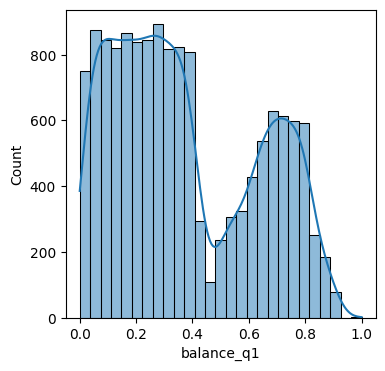

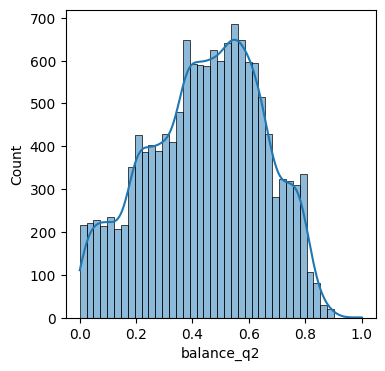

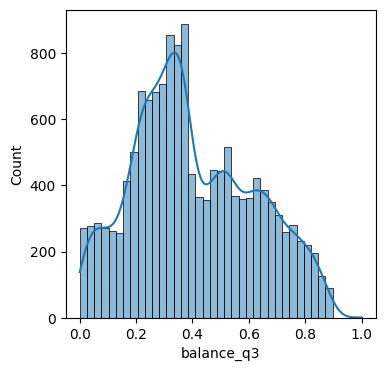

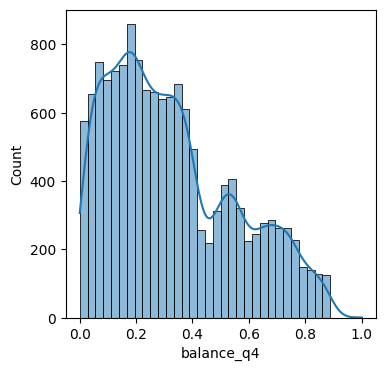

In [229]:
for column in X_train_min_max.columns[4:]:
    plt.figure(figsize = (4,4))
    sns.histplot(X_train_min_max[column], kde = True)
    plt.show()

### Using Power tranform

In [230]:
power_transform = PowerTransformer()

In [231]:
X_train_power = power_transform.fit_transform(X_train[numerical_data.drop(columns = ['offer_accepted']).columns])

In [232]:
X_train_power = pd.DataFrame(X_train_power, columns=numerical_data.drop(columns = ['offer_accepted']).columns)

In [233]:
X_train_power

,bank_accounts_open,credit_cards_held,homes_owned,household_size,balance_q1,balance_q2,balance_q3,balance_q4
0,-0.560085,0.288106,-0.489386,-1.351904,-0.273570,0.225841,1.187955,1.124310
1,-0.560085,1.299387,-0.489386,-0.439747,1.195520,1.022451,-1.115031,0.483440
2,-0.560085,0.288106,-0.489386,-1.351904,-0.317307,-0.177667,-0.248523,-0.112433
3,1.781426,1.299387,-0.489386,-0.439747,-1.122872,-1.189461,-1.480203,-1.376952
4,1.781426,0.288106,-0.489386,0.456895,1.091079,-0.011516,-0.136323,-1.414645
...,...,...,...,...,...,...,...,...
14367,-0.560085,-1.233711,-0.489386,0.456895,0.651426,-0.920189,0.246579,0.652276
14368,-0.560085,1.299387,-0.489386,-0.439747,-1.062693,-2.060758,-1.631059,-1.045488
14369,-0.560085,-1.233711,-0.489386,-1.351904,-0.582159,-2.119472,-2.138944,-0.659400
14370,-0.560085,-1.233711,-0.489386,0.456895,-1.949043,-2.174259,-1.597220,-0.779180


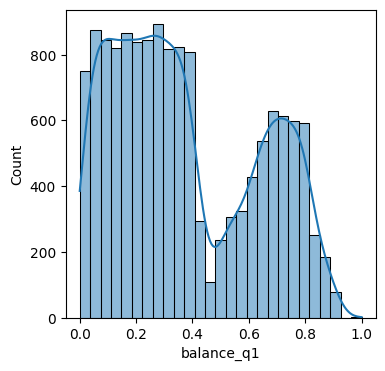

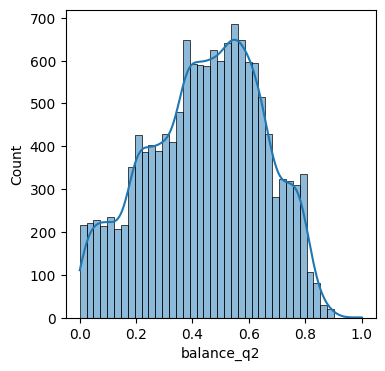

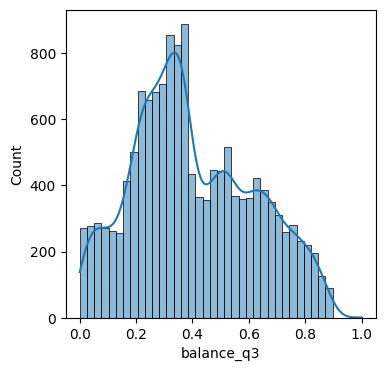

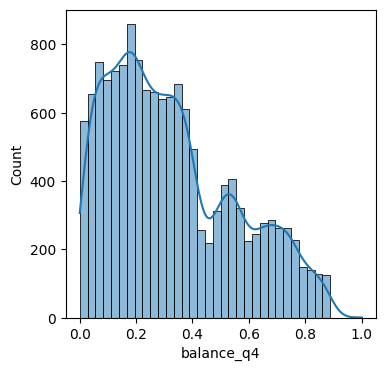

In [234]:
for column in X_train_min_max.columns[4:]:
    plt.figure(figsize = (4,4))
    sns.histplot(X_train_min_max[column], kde = True)
    plt.show()

## Train model

### Initial model

In [235]:
logistic_reg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=700)

In [236]:
logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=700, random_state=0)

In [237]:
logistic_reg.n_iter_

array([487])

In [238]:
train_pred = logistic_reg.predict(X_train)

In [239]:
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [240]:
test_pred = logistic_reg.predict(X_test)

In [241]:
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Using balanced data

In [242]:
count_classes = full_data['offer_accepted'].value_counts()

In [243]:
count_classes

offer_accepted
0    16945
1     1021
Name: count, dtype: int64

In [244]:
count_classes[0] / full_data.shape[0]

0.943170433040187

In [245]:
(count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1])

0.886340866080374

---------------------------------------

#### Oversampling

In [246]:
ros = RandomOverSampler(random_state=42)

In [247]:
X_train_over, y_train_over = ros.fit_resample(X_train,y_train)

In [248]:
y_train_over.value_counts()

offer_accepted
0    13567
1    13567
Name: count, dtype: int64

In [249]:
print('Resampled dataset shape %s' % Counter(y_train_over))

Resampled dataset shape Counter({0: 13567, 1: 13567})


#### Undersampling

In [250]:
rus = RandomUnderSampler(random_state=42)

In [251]:
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [252]:
y_train_under.value_counts()

offer_accepted
0    805
1    805
Name: count, dtype: int64

In [253]:
print('Resampled dataset shape %s' % Counter(y_train_under))

Resampled dataset shape Counter({0: 805, 1: 805})


#### SMOTE

In [254]:
sm = SMOTE(random_state=100, k_neighbors=5)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [255]:
y_train_SMOTE.value_counts()

offer_accepted
0    13567
1    13567
Name: count, dtype: int64

In [256]:
print('Resampled dataset shape %s' % Counter(y_train_SMOTE))

Resampled dataset shape Counter({0: 13567, 1: 13567})


#### Tomeklinks

In [257]:
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)
y_train_tl.value_counts()

offer_accepted
0    13143
1      805
Name: count, dtype: int64

In [258]:
print('Resampled dataset shape %s' % Counter(y_train_tl))

Resampled dataset shape Counter({0: 13143, 1: 805})


## Test model

In [259]:
def get_scores(balance_method, test_sample, test_predictions):
    print(f"Scores using {balance_method} to balance data")
    print("The accuracy in the TEST set using is: {:.2f}".format(accuracy_score(y_test,test_predictions)))
    print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,test_predictions)))
    print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,test_predictions)))
    print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,test_predictions)))
    print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,test_predictions)))

### Initial model

In [260]:
print("Train accuracy initial model: {:.2f}".format(logistic_reg.score(X_train, y_train)))
print("Test accuracy initial model: {:.2f}".format(logistic_reg.score(X_test, y_test)))

Train accuracy initial model: 0.94
Test accuracy initial model: 0.94


In [261]:
cm_train = confusion_matrix(y_train, train_pred)
cm_test = confusion_matrix(y_test, test_pred)

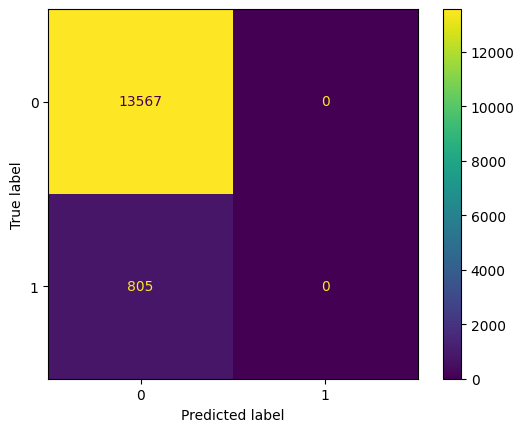

In [262]:
disp = ConfusionMatrixDisplay(cm_train, display_labels=logistic_reg.classes_)
disp.plot()
plt.show()

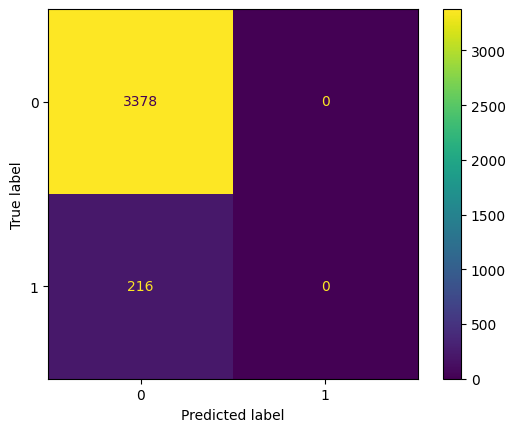

In [263]:
disp = ConfusionMatrixDisplay(cm_test, display_labels=logistic_reg.classes_)
disp.plot()
plt.show()

### Using oversampling

In [264]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train_over, y_train_over)
y_pred_test_ros = lr.predict(X_test)

get_scores('OVERSAMPLING', y_test, y_pred_test_ros)

Scores using OVERSAMPLING to balance data
The accuracy in the TEST set using is: 0.69
The precision in the TEST set is: 0.13
The recall in the TEST set is: 0.70
The F1 in the TEST set is: 0.21
The Kappa in the TEST set is: 0.12


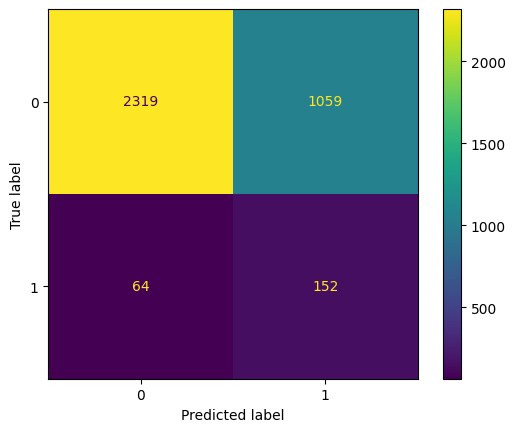

In [265]:
cm_test = confusion_matrix(y_test,y_pred_test_ros)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

### Using undersampling

In [266]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_under, y_train_under)
y_pred_test_rus = lr.predict(X_test)

get_scores('UNDERSAMPLING', y_test, y_pred_test_rus)

Scores using UNDERSAMPLING to balance data
The accuracy in the TEST set using is: 0.67
The precision in the TEST set is: 0.12
The recall in the TEST set is: 0.71
The F1 in the TEST set is: 0.21
The Kappa in the TEST set is: 0.12


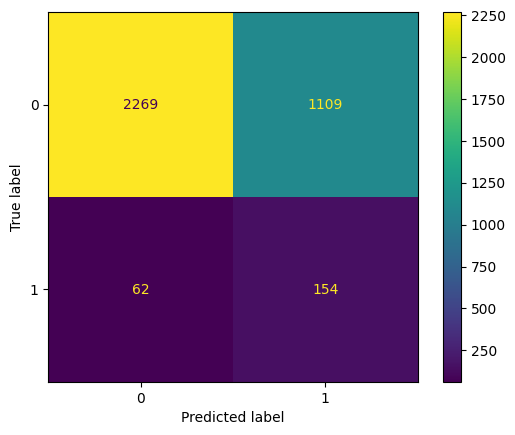

In [267]:
cm_test = confusion_matrix(y_test,y_pred_test_rus)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

### Using SMOTE

In [268]:
lr = LogisticRegression(max_iter=1200)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test_SMOTE = lr.predict(X_test)

get_scores('SMOTE', y_test, y_pred_test_SMOTE)

Scores using SMOTE to balance data
The accuracy in the TEST set using is: 0.79
The precision in the TEST set is: 0.12
The recall in the TEST set is: 0.42
The F1 in the TEST set is: 0.19
The Kappa in the TEST set is: 0.11


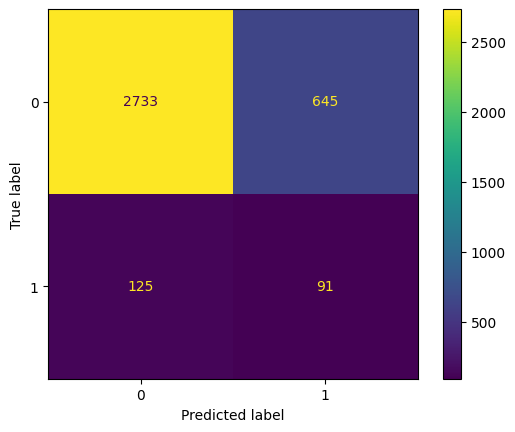

In [269]:
cm_test = confusion_matrix(y_test,y_pred_test_SMOTE)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

### Using Tomeklink

In [ ]:
lr = LogisticRegression(max_iter=1200)
lr.fit(X_train_tl, y_train_tl)
y_pred_test_tl = lr.predict(X_test)

get_scores('SMOTE', y_test, y_pred_test_tl)

## Improve model

In [ ]:
### Initial model 

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)